In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Plane Crashes /Airplane_Crashes_and_Fatalities_Since_1908.csv', infer_datetime_format=True)
data.Date = pd.to_datetime(data.Date)


for i in range(97, 123):
  data.Time = data.Time.str.replace("%c" %i + ':', '')
  data.Time = data.Time.str.replace("%c" %i, '')
  data.Time = data.Time.str.replace('1-01-01 01:00:00', '01:00')
  data.Time = data.Time.str.replace('1:00', '01:00')
  data.Time = data.Time.str.replace('0000000000000000000000000001:00', '01:00')
  data.Time = data.Time.str.replace('000000000000000000000000001:00', '01:00')
  data.Time = data.Time.str.replace('001:00', '01:00')
  data.Time = data.Time.str.replace(' ', '')
  data.Time = data.Time.str.replace("'", ':')
  data.Time = data.Time.str.replace('.', ':')
  data.Time = data.Time.str.replace('0943', '09:43')
data.Time = pd.to_datetime(data.Time, errors='coerce', format='%H:%M')
#data.Time = data.Time.apply(lambda x: x.time())

print(data.info())
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3009 non-null   datetime64[ns]
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3562 non-null   object        
 6   Type          5241 non-null   object        
 7   Registration  4933 non-null   object        
 8   cn/In         4040 non-null   object        
 9   Aboard        5246 non-null   float64       
 10  Fatalities    5256 non-null   float64       
 11  Ground        5246 non-null   float64       
 12  Summary       4878 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 535.2+ KB
None


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,2009-05-20,1900-01-01 06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,2009-05-26,NaT,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,2009-06-01,1900-01-01 00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,2009-06-07,1900-01-01 08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,2009-06-08,NaT,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [2]:
data.Location = data.Location.apply(lambda x: str(x))
for i in range(10):
  data.Location = data.Location.replace(i, '')

data.Location = data.Location.apply(lambda x: x[::-1])

In [3]:
nation = data.Location.str.split(pat=',', expand=True)
nation = nation.loc[:,0].apply(lambda x: x[::-1])
data['Nation'] = nation

data = data[['Date', 'Time', 'Location', 'Nation', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary']]
data.Location = data.Location.apply(lambda x: x[::-1])

data.head()

,Date,Time,Location,Nation,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,1900-01-01 17:18:00,"Fort Myer, Virginia",Virginia,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,1900-01-01 06:30:00,"AtlantiCity, New Jersey",New Jersey,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaT,"Victoria, British Columbia, Canada",Canada,Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,1900-01-01 18:30:00,Over the North Sea,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,1900-01-01 10:30:00,"Near Johannisthal, Germany",Germany,Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
us_states = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Plane Crashes /US states.xlsx')
for state in us_states.US_States:
  data.Nation = data.Nation.str.replace('{}'.format(state), 'US')
data.Nation = data.Nation.str.replace(' US', 'US')
data.Nation = data.Nation.str.lstrip()
data.head()

,Date,Time,Location,Nation,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,1900-01-01 17:18:00,"Fort Myer, Virginia",US,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,1900-01-01 06:30:00,"AtlantiCity, New Jersey",US,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaT,"Victoria, British Columbia, Canada",Canada,Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,1900-01-01 18:30:00,Over the North Sea,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,1900-01-01 10:30:00,"Near Johannisthal, Germany",Germany,Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


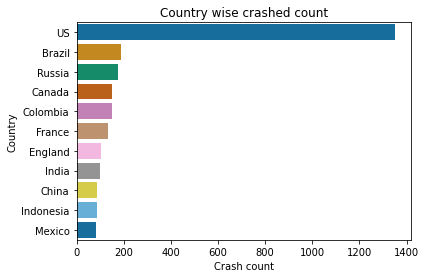

In [5]:
nation_wise_count = data.Nation.value_counts()

sns.barplot(x=nation_wise_count[:11], y=nation_wise_count[:11].index, palette='colorblind',)
plt.title('Country wise crashed count')
plt.xlabel('Crash count')
plt.ylabel('Country')
plt.show()

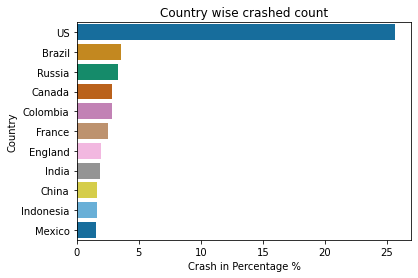

In [9]:
sns.barplot(x=nation_wise_count[:11]*100/sum(nation_wise_count), y=nation_wise_count[:11].index, palette='colorblind',)
plt.title('Country wise crashed count')
plt.xlabel('Crash in Percentage %')
plt.ylabel('Country')
plt.show()

In [ ]:
series = []
for hour in data.Time.dt.hour:
  if hour <= 3:
    series.append('first')
  elif hour <= 6:
    series.append('second')
  elif hour <= 9:
    series.append('third')
  elif hour <= 12:
    series.append('fourth')
  elif hour <= 15:
    series.append('fifth')
  elif hour <= 18:
    series.append('sixth')
  elif hour <= 21:
    series.append('seventh')
  elif hour <= 21:
    series.append('eighth')
  else :
    series.append(np.nan)
data['Quarter'] = series


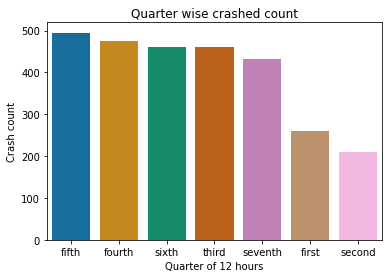

In [ ]:
time_wise_count = data.Quarter.value_counts()
sns.barplot(x = time_wise_count.index, y = time_wise_count, palette='colorblind')
plt.title('Quarter wise crashed count')
plt.ylabel('Crash count')
plt.xlabel('Quarter of 12 hours')
plt.show()

In [ ]:
for word in ['Air show', 'Airshow']:
  data.Route = data.Route.str.replace(word, 'Air Show')

for word in ['Exercises', 'Military exercise', 'Military exercises', 'Militiary training', 'Otis AFB', 'Training', 'Training exercise', 'Demonstration',
             'Training flight', 'Training/Aranchi',  'Instructional Flight']:
             data.Route = data.Route.str.replace(word, 'Exercise')

for word in ['Radio surveillance mission', 'Search mission', 'Service mission', 'Transporting troops', 'Bombing run', 'Medical flight',
                                     'Medical evacuation flight', 'Transporting troops', 'Ferrying fire fighters', 'Ferrying troops']:
             data.Route = data.Route.str.replace(word, 'Mission')

for word in ['Local sightseeing', 'Local tour', 'Observation flight out of Cape Schmidt', 'Sighteeing', 
                                     'Sight seeing', 'Patrol']:
             data.Route = data.Route.str.replace(word, 'Sightseeing')

for word in ['Sky Diving', 'Skydiving', 'Movie set',  'Parachuting']:
  data.Route = data.Route.str.replace(word, 'Fun Ride')

for word in ['Test', 'Test flight', 'Testing flight', 'Testinging flight']:
  data.Route = data.Route.str.replace(word, 'Testing')

for word in ['Survey', 'Traffireporting']:
  data.Route = data.Route.str.replace(word, 'Survey/Reporting')

data.Route = data.Route.str.replace('Local', 'Local Flight')


In [ ]:
series = []
words = ['Air Show', 'Exercise', 'Mission', 'Sightseeing', 'Fun Ride', 'Testing', 'Survey/Reporting', 'Local Flight', np.nan]
route_wise = data[['Route']]
for val in route_wise.Route:
  if val in words:
    series.append(val)
  else:
    series.append('Public Transport')

data['Class'] = series

data = data[['Date',	'Time',	'Quarter', 'Location', 'Nation',	'Operator',	'Flight #',	'Route', 'Class',	'Type',	'Registration',	'cn/In',	'Aboard',
             'Fatalities',	'Ground',	'Summary'	]]
data.head()

,Date,Time,Quarter,Location,Nation,Operator,Flight #,Route,Class,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,1900-01-01 17:18:00,sixth,"Fort Myer, Virginia",US,Military - U.S. Army,NaN,Exercise,Exercise,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,1900-01-01 06:30:00,second,"AtlantiCity, New Jersey",US,Military - U.S. Navy,NaN,Testing,Testing,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaT,NaN,"Victoria, British Columbia, Canada",Canada,Private,-,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,1900-01-01 18:30:00,sixth,Over the North Sea,Over the North Sea,Military - German Navy,NaN,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,1900-01-01 10:30:00,fourth,"Near Johannisthal, Germany",Germany,Military - German Navy,NaN,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


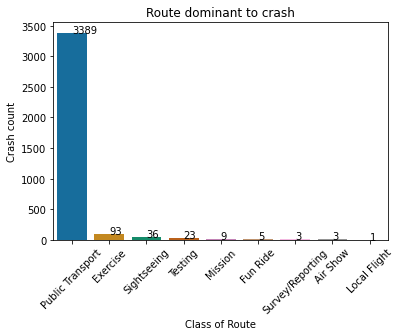

In [ ]:
route_wise = data.Class
route_wise_count = route_wise.dropna().value_counts()

sns.barplot(x = route_wise_count.index, y = route_wise_count, palette='colorblind')
plt.xticks(rotation=45)
for index, value in enumerate(route_wise_count):
    plt.text(index, value, str(value))
plt.title('Route dominant to crash')
plt.ylabel('Crash count')
plt.xlabel('Class of Route')
plt.show()

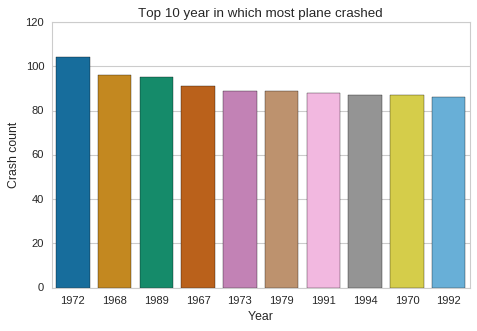

In [ ]:
plt.figure(figsize=(6,4))
year_wise = data.Date.dt.year
year_wise_count = year_wise.value_counts()
year_wise_count.index = year_wise_count.index.astype('str')

sns.barplot(x = year_wise_count[:10].index, y = year_wise_count[:10], palette='colorblind')
plt.title('Top 10 year in which most plane crashed')
plt.ylabel('Crash count')
plt.xlabel('Year')
plt.show()

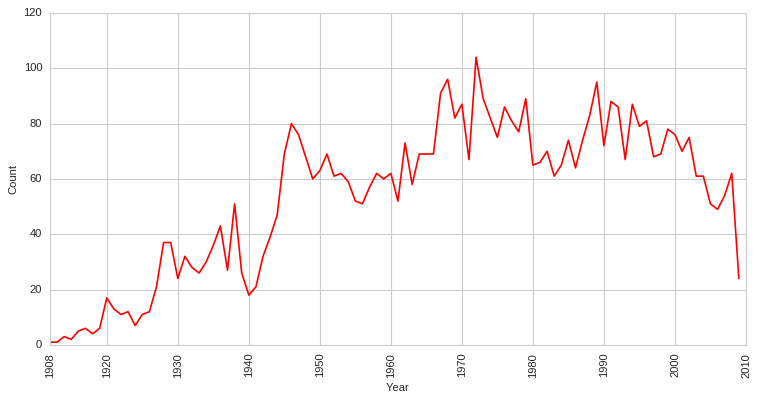

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.lineplot(x= year_wise_count.sort_index().index, y= year_wise_count.sort_index(), color='red', linewidth=1.5)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

ticklabels = ['1908', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
plt.xticks(ticklabels, rotation=90)
plt.show()


In [ ]:
decade_wise  = list(data.Date.dt.year.dropna())
decade_wise = pd.DataFrame(decade_wise, columns=['Year'])
series = []
for year in decade_wise.Year:
  if year <= 1918:
    series.append('First')
  elif year <= 1928:
    series.append('Second')
  elif year <= 1938:
    series.append('Third')
  elif year <= 1948:
    series.append('Fourth')
  elif year <= 1958:
    series.append('Fifth')
  elif year <= 1968:
    series.append('Sixth')
  elif year <= 1978:
    series.append('Seventh')
  elif year <= 1988:
    series.append('Eight')
  elif year <= 1998:
    series.append('Ninth')
  else:
    series.append('Tenth')
decade_wise['Decade'] = series

decade_wise.tail()

,Year,Decade
5263,2009,Tenth
5264,2009,Tenth
5265,2009,Tenth
5266,2009,Tenth
5267,2009,Tenth


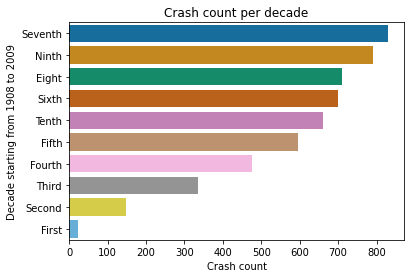

In [ ]:
decade_wise_count = decade_wise.Decade.value_counts()

sns.barplot(x = decade_wise_count , y = decade_wise_count.index, palette='colorblind')
plt.title('Crash count per decade')
plt.ylabel('Decade starting from 1908 to 2009')
plt.xlabel('Crash count')
plt.show()

In [ ]:
data[['Aboard', 'Fatalities', 'Ground']].dropna().mean()*100/27.589190

Aboard        100.000001
Fatalities     72.872205
Ground          5.839800
dtype: float64


If 100 people aboards and suddenly flight gets crashed then chances of death is 73 people and on ground 6 people may get killed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


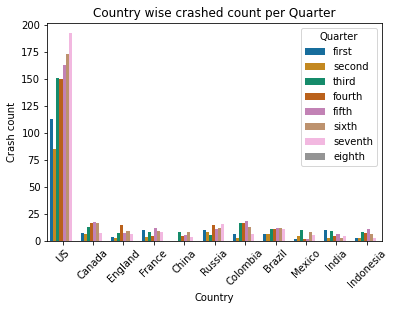

In [ ]:
nation_wise_count = data[data.Nation.isin(['US', 'Brazil', 'Russia', 'Colombia', 'Canada', 'France', 'England', 'India', 'China', 'Indonesia', 
                                          'Mexico'])][['Nation', 'Quarter']]

sns.countplot(nation_wise_count.Nation, palette='colorblind', hue=nation_wise_count.Quarter, hue_order= ['first', 'second', 'third', 'fourth', 'fifth',
                                                                                                         'sixth', 'seventh', 'eighth'])
plt.title('Country wise crashed count per Quarter')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Crash count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Crash count')

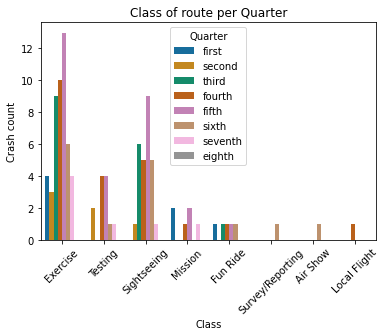

In [ ]:
class_time = data[data.Class.isin(['Air Show', 'Exercise', 'Mission', 'Sightseeing', 'Fun Ride', 'Testing', 'Survey/Reporting', 
                                   'Local Flight'])][['Class', 'Quarter']].dropna()

sns.countplot(class_time.Class, hue=class_time.Quarter, palette='colorblind', hue_order= ['first', 'second', 'third', 'fourth', 'fifth',
                                                                                                         'sixth', 'seventh', 'eighth'])
plt.title('Class of route per Quarter')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.ylabel('Crash count')

In [ ]:
Temp = data.copy()
Temp.Operator = Temp.Operator.str.upper()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']
Temp

,isMilitary
Passenger,4469
Military,781
